In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Step 1: Load Dataset from UCI Repository
data = pd.read_csv(r"C:\Users\jashw\Downloads\weatherHistory.csv\weatherHistory.csv")

In [6]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [7]:
# Check for missing values
print(data.isnull().sum())

# For simplicity, drop rows with missing values
data = data.dropna()


Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [9]:
# Select features and target variable
features = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)']
target = 'Precip Type'  # Predicting the type of precipitation

# Encode the target variable
data = data.dropna(subset=[target])  # Drop rows where target is NaN
data[target] = data[target].astype('category').cat.codes


In [12]:
# Divide the data into training and testing sets.

from sklearn.model_selection import train_test_split

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Building and Training the Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the model
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17090
           1       1.00      1.00      1.00      2098

    accuracy                           1.00     19188
   macro avg       1.00      1.00      1.00     19188
weighted avg       1.00      1.00      1.00     19188



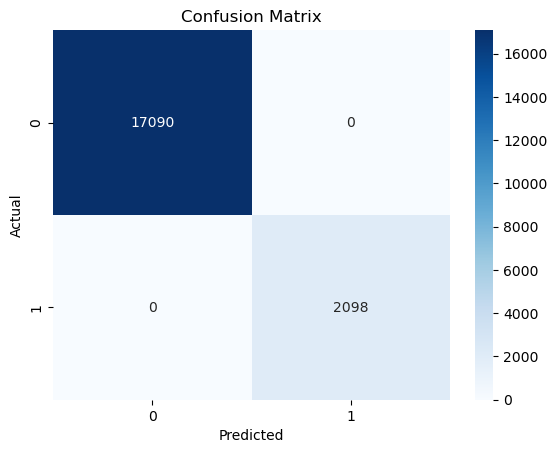

In [14]:
# Evaluating the Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


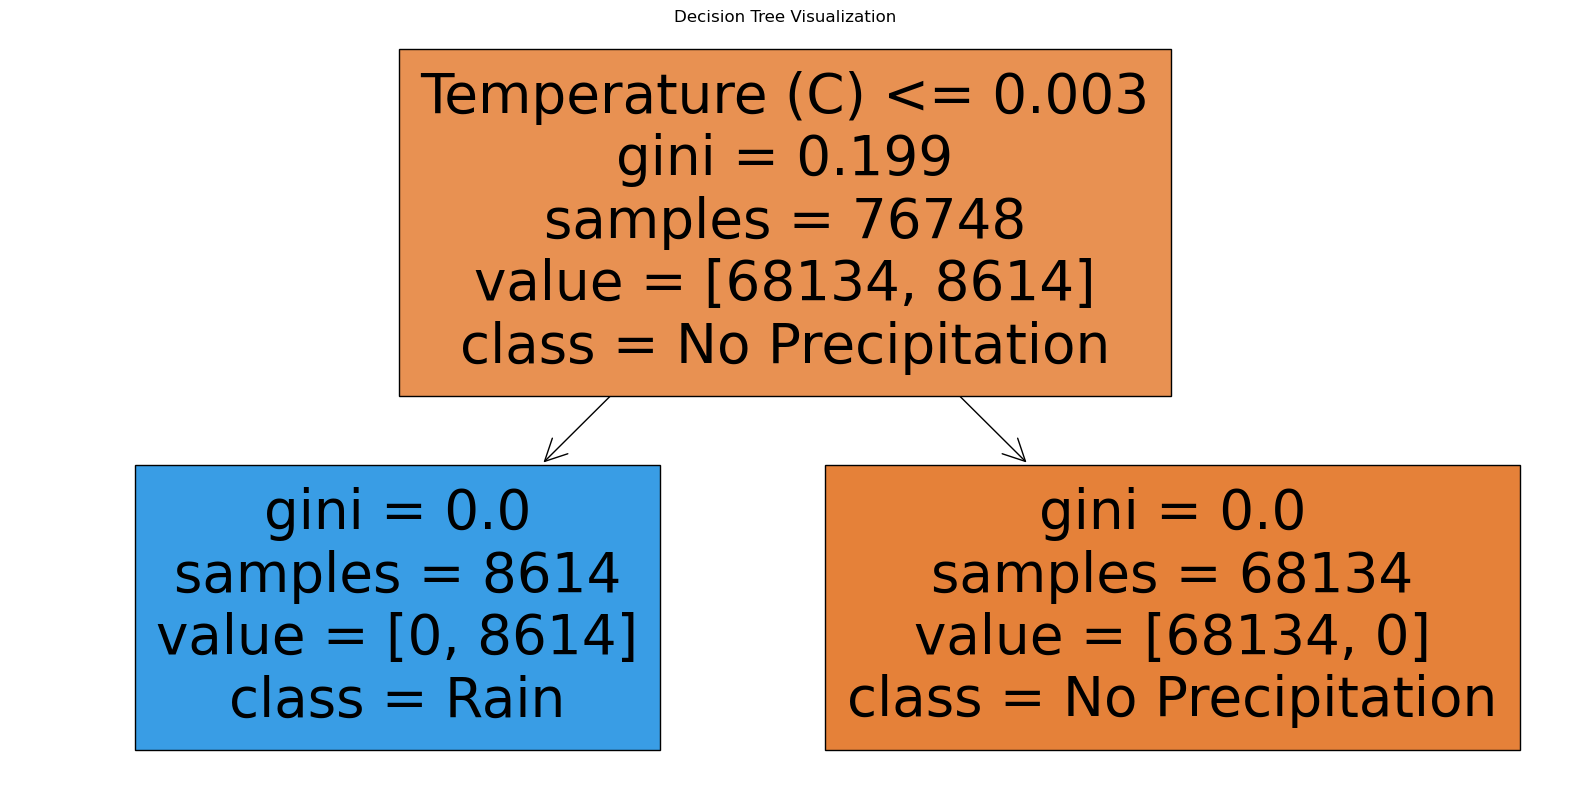

In [15]:
# Visualizing the Decision Tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=features, class_names=['No Precipitation', 'Rain'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()
